In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)] # petal length and petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, .5]])

In [3]:
y_pred

array([0])

### Tensor Flow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__


'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashionmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashionmnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_validate, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_validate, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300, activation='relu'))

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01407157,  0.0183099 , -0.04973708, ...,  0.03028394,
         0.00019221, -0.06770366],
       [ 0.04390498,  0.0436737 ,  0.07122856, ..., -0.02110891,
        -0.04620565,  0.03898388],
       [ 0.05484362, -0.02160038,  0.04983184, ..., -0.05177543,
         0.02090303, -0.06624985],
       ...,
       [ 0.07274334, -0.00212145, -0.01257518, ...,  0.05402517,
         0.06658629, -0.04732791],
       [-0.07068341, -0.03168366, -0.05209908, ...,  0.03346145,
        -0.03845877, -0.06922223],
       [-0.06344721,  0.04120503, -0.02945491, ..., -0.0090782 ,
        -0.0577517 ,  0.00630017]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_validate, y_validate))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9989 - accuracy: 0.6828 - val_loss: 0.5203 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5155 - accuracy: 0.8179 - val_loss: 0.4559 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4528 - accuracy: 0.8425 - val_loss: 0.4224 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4172 - accuracy: 0.8518 - val_loss: 0.3987 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4003 - accuracy: 0.8587 - val_loss: 0.3927 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3773 - accuracy: 0.8662 - val_loss: 0.3710 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3666 - accuracy: 0.8718 - val_loss: 0.3686 - val_accuracy:

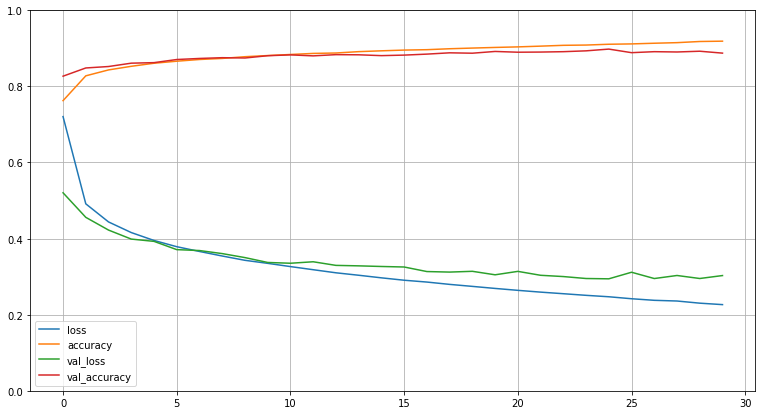

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(13,7))
plt.grid(True)
plt.gca().set_ylim(0,1) #setting the vertical range to [0->1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 705us/step - loss: 0.3433 - accuracy: 0.8772


[0.34328925609588623, 0.8772000074386597]